**Project Description**

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


In [48]:
import pandas as pd

# Load the dataset from the URL into a DataFrame
url = 'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to ensure it's loaded properly
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In this project, given the prevalence of descriptive and categorical data, I've intentionally chosen to skip traditional descriptive statistics. Instead, I'll focus on preprocessing these data types by encoding the text-based information and selectively dropping certain columns. This approach aims to streamline the data preparation process by transforming textual information into numerical representations while strategically reducing the dimensionality of the dataset.

In [49]:
df.shape

(31647, 18)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


**There are no null values in the dataset.**

In [51]:
df.drop(['month','ID','contact', 'day'], axis=1, inplace=True)
#dropping columns month, ID, contact,day as they have no significance for classifing task.

# One-Hot Encoding for 'marital' and 'education'
from sklearn.preprocessing import LabelEncoder

encoded_df = pd.get_dummies(df, columns=['marital', 'education','poutcome','job'])

# Label Encoding for 'default' and 'housing'
label_encoder = LabelEncoder()
encoded_df['default'] = label_encoder.fit_transform(df['default'])
encoded_df['housing'] = label_encoder.fit_transform(df['housing'])
encoded_df['subscribed'] = label_encoder.fit_transform(df['subscribed'])
encoded_df['loan'] = label_encoder.fit_transform(df['loan'])


encoding ['marital', 'education','poutcome','job'] into one hot encdoding and rest to label encodings.

Random Forest classifiers, scaling the data might not be necessary. Random Forest models are not sensitive to the scale of numeric features due to their nature of making decisions based on feature splits rather than on the feature values themselves. Therefore, in many cases, scaling is not a prerequisite when using Random Forest algorithms.

In [52]:
# Separate the target variable 'subscribed' into y
y = encoded_df['subscribed']

# Separate the features (excluding 'subscribed') into X
X = encoded_df.drop('subscribed', axis=1)

In [53]:
y.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

0  --->  27932

1  --->   3715

The dataset indicates an imbalance where the number of data points in the 0th category outweighs those in the 1st category. This imbalance can introduce bias, leading the model to favor classifying instances into the 0th category. To address this issue, we'll implement oversampling specifically for the 1st category. By oversampling the minority class (1st category), we aim to mitigate this imbalance and enable the model to learn more effectively from the underrepresented class.

In [54]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' represents your feature dataset and 'y' is your target variable
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority class in 'y'
X_oversampled, y_oversampled = smote.fit_resample(X, y)

**Now we will create a Random Forrest Classifier model**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the oversampled data into training and test sets
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier using the oversampled training data
rf_classifier.fit(X_train_os, y_train_os)

# Predict on the test set
y_pred_rf_os = rf_classifier.predict(X_test_os)

# Generate and print the classification report
print("Classification Report for Random Forest (with oversampling):")
print(classification_report(y_test_os, y_pred_rf_os))


Classification Report for Random Forest (with oversampling):
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5603
           1       0.95      0.92      0.94      5570

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



As you can see model is performing well accross all the spectrun of metrics

I am now   planning to conduct cross-validation to assess the model's generalization ability and ensure it is not overfitting. This step allows us to evaluate the model's performance on unseen data, providing a more robust validation of its effectiveness. By performing cross-validation, we aim to validate the model's consistency and reliability across different subsets of the dataset, thereby gaining insights into its performance on unobserved data.

In [56]:
from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_oversampled, y_oversampled, cv=10, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Scores (F1-score):", cv_scores)
print(f"Mean F1-score: {cv_scores.mean():.4f}")


Cross-Validation Scores (F1-score): [0.45226405 0.87772841 0.97430519 0.97613198 0.97012057 0.97252843
 0.97408964 0.97352271 0.97251882 0.97392826]
Mean F1-score: 0.9117


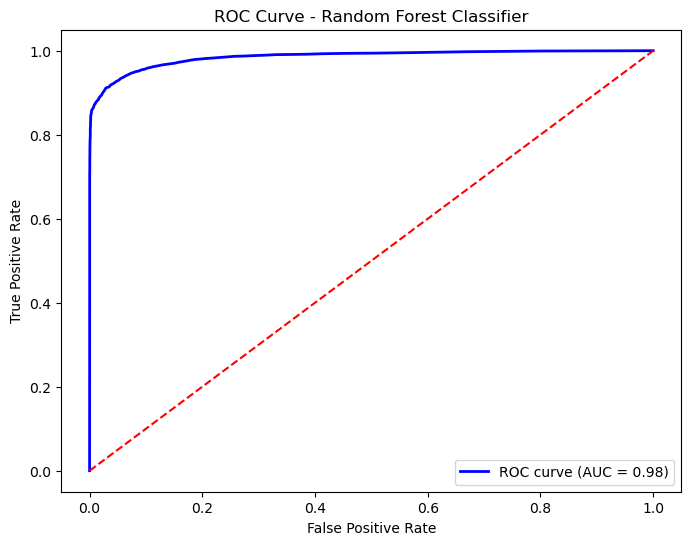

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
#rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Fit the classifier
rf_classifier.fit(X_train_os, y_train_os)

# Obtain predicted probabilities
y_pred_prob = rf_classifier.predict_proba(X_test_os)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test_os, y_pred_prob)

# Calculate the Area Under Curve (AUC) for ROC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()
#This code calculates the ROC curve by obtaining predicted probabilities from the Random Forest Classifier and then uses Matplotlib to plot the curve. The AUC (Area Under Curve) is also calculated and displayed in the plot's legend, providing an indication of the classifier's performance. Adjust the classifier's hyperparameters and the split ratios as needed for your specific analysis.








An ROC AUC (Receiver Operating Characteristic Area Under Curve) of 0.98 indicates that your Random Forest Classifier's performance is quite high. A value close to 1 signifies excellent discrimination between the positive and negative classe

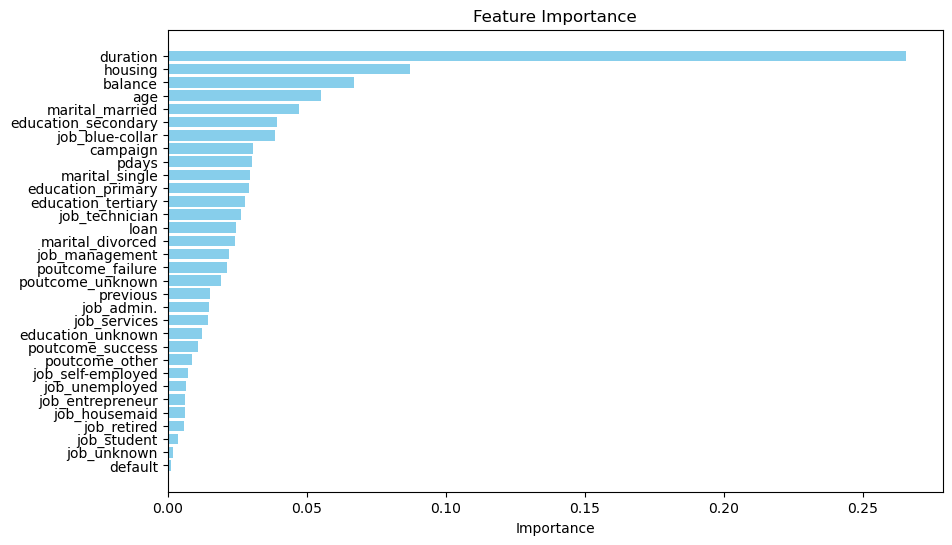

In [58]:
# Plotting feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X_train_os.columns  # Replace this with your actual feature names

# Creating a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [59]:
feature_importance_df[:7]

,Feature,Importance
5,duration,0.265393
3,housing,0.087048
2,balance,0.067127
0,age,0.055278
10,marital_married,0.047182
13,education_secondary,0.039429
21,job_blue-collar,0.038568


**Insights**

Top 7 features that are very important in terms of model's classification if an indiusual will subscribe to term deposit or not.

1)Duration (0.265): This feature seems to be the most important according to the Random Forest classifier. Higher call durations might have a significant impact on the outcome being predicted.

2)Housing (0.087): The fact whether a person has a housing loan or not holds considerable importance in the model's predictions.

3)Balance (0.067): The balance amount in an account also contributes significantly to the prediction.

4)Age (0.055): Age appears to have a moderate importance level. It might influence the outcome but less than the top three features.

5)Marital Status - Married (0.047): The marital status of being married is a notable factor influencing the predictions.

6)Education - Secondary (0.039): Having a secondary education level also seems to play a role in the model's decisions.

7)Job - Blue-collar (0.038): Occupation as a blue-collar worker is among the influential factors in the model.

**We have created a robust model now let's generate a prediction on below testing data**

In [60]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv"

# Read the dataset
df_test = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,380,1,-1,0,unknown,no


In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_data(df):
    df.drop(['month','ID','contact', 'day'], axis=1, inplace=True)

    # One-Hot Encoding for 'marital' and 'education'
    encoded_df = pd.get_dummies(df, columns=['marital', 'education', 'poutcome', 'job'])

    # Label Encoding for 'default' and 'housing'
    label_encoder = LabelEncoder()
    encoded_df['default'] = label_encoder.fit_transform(df['default'])
    encoded_df['housing'] = label_encoder.fit_transform(df['housing'])
    #encoded_df['subscribed'] = label_encoder.fit_transform(df['subscribed'])
    encoded_df['loan'] = label_encoder.fit_transform(df['loan'])

    # Separate the target variable 'subscribed' into y
    #y = encoded_df['subscribed']

    # Separate the features (excluding 'subscribed') into X
    X = encoded_df

    return X


In [62]:
X_test= encode_data(df_test)


In [63]:
X.shape

(31647, 32)

In [64]:
y_test_pred = rf_classifier.predict(X_test)


**These are the predictions for test data**

In [65]:
y_test_pred

array([0, 1, 0, ..., 0, 1, 0])